# zomato exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("zomato.csv", encoding='latin-1')
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe() #it takes only numerical features and omits categoricals

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## things we need to do:
1.missing values.
2.explore categorical and numerical variables.
3.finding relationship between variables.

In [9]:
#missing value
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
#Cuisines have 9 missing values

In [13]:
#missing value using list comprehension
[x for x in df.columns if df[x].isnull().sum()>0]

['Cuisines']

In [14]:
df.shape

(9551, 21)

In [16]:
df_c=pd.read_excel('Country-Code.xlsx')
df_c.head(3)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil


In [17]:
#we are going to combine two datasets.

In [19]:
finaldf=pd.merge(df, df_c,on="Country Code", how='left')
finaldf.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [20]:
finaldf.shape

(9551, 22)

In [21]:
finaldf.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [22]:
 finaldf.Country.value_counts()

India             8652
United States      434
United Kingdom      80
South Africa        60
Brazil              60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Sri Lanka           20
Singapore           20
Canada               4
Name: Country, dtype: int64

In [24]:
country_names=finaldf.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'South Africa', 'Brazil',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Sri Lanka', 'Singapore', 'Canada'],
      dtype='object')

In [26]:
country_values=finaldf.Country.value_counts().values
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x263767633a0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.392%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.735%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.873%')])

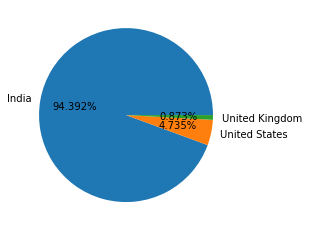

In [31]:
#Top 4 countries using zomato
plt.pie(country_values[:3], labels=country_names[:3], autopct="%1.3f%%")

# Numerical variables

In [33]:
finaldf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [44]:
ratings=finaldf.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## observations:
when rating between 4.5 to 4.9---> Excellent
when rating between 4.0 to 4.5---> Very Good
when rating between 3.5 to 4.0---> Good
.
.
.

In [45]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


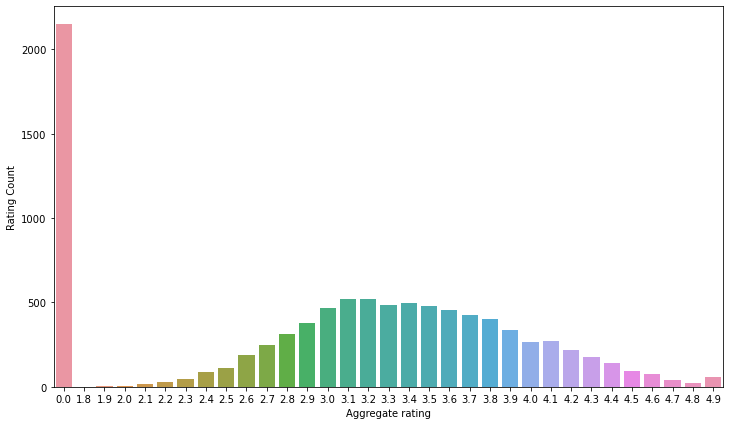

In [52]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,7)
sns.barplot(x="Aggregate rating",y="Rating Count", data=ratings)
plt.show()

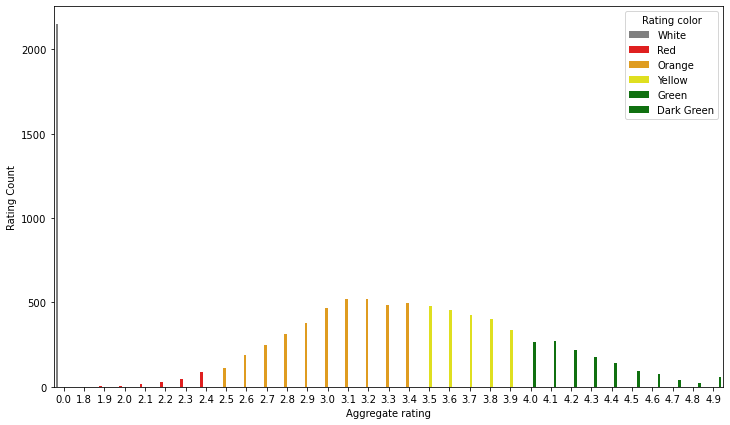

In [55]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,7)
sns.barplot(x="Aggregate rating",y="Rating Count", data=ratings, hue='Rating color', palette=['grey','red','orange','yellow','green','green'])
plt.show()

<AxesSubplot:xlabel='Rating color', ylabel='count'>

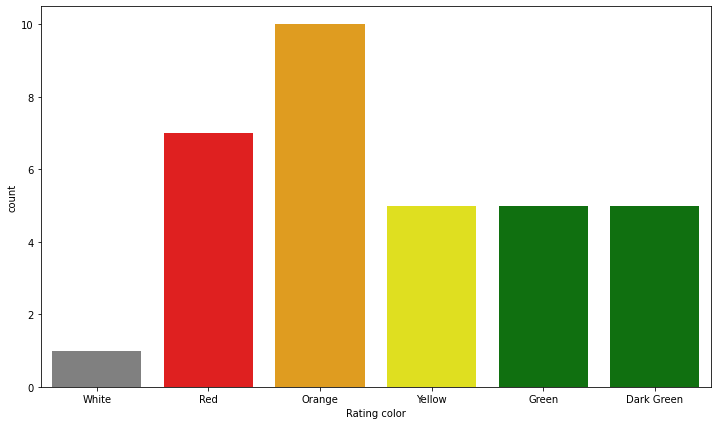

In [57]:
sns.countplot(x='Rating color',data=ratings,palette=['grey','red','orange','yellow','green','green'])

In [58]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [59]:
### find countries that has given zero ratings

In [61]:
finaldf.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [63]:
zero=finaldf["Country"].loc[finaldf["Aggregate rating"]==0.0]
zero

30              Brazil
58              Brazil
69              Brazil
77              Brazil
78              Brazil
             ...      
9109             India
9110             India
9111             India
9112             India
9351    United Kingdom
Name: Country, Length: 2148, dtype: object

In [64]:
zero.value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [65]:
finaldf[finaldf['Rating color']=='White'].groupby("Country").size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [68]:
finaldf[finaldf['Rating color']=='White']["Country"].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [69]:
#find which currency is used by which country

In [72]:
finaldf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [80]:
finaldf.groupby(['Currency','Country']).size().reset_index().rename(columns={0:'Counts'})

,Currency,Country,Counts
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [81]:
#which country have online delivery option

In [84]:
finaldf['Country'].loc[finaldf['Has Online delivery']=='Yes'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [87]:
finaldf.groupby(['Country','Has Online delivery']).size().reset_index()#all countries

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [88]:
finaldf[finaldf['Has Online delivery']=='Yes']['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [89]:
finaldf[finaldf['Has Online delivery']=='No']['Country'].value_counts()

India             6229
United States      434
United Kingdom      80
South Africa        60
Brazil              60
New Zealand         40
Turkey              34
UAE                 32
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Sri Lanka           20
Singapore           20
Canada               4
Name: Country, dtype: int64

In [91]:
finaldf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [92]:
#create  a pie chart for top 5  cities distribution

In [93]:
finaldf.City.value_counts()

New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Dicky Beach          1
Consort              1
Quezon City          1
Mayfield             1
Lakes Entrance       1
Name: City, Length: 141, dtype: int64

([<matplotlib.patches.Wedge at 0x2637856a250>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.869%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.068%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.590%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.158%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.315%')])

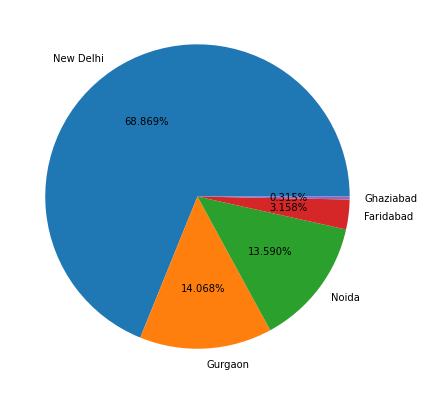

In [97]:
plt.pie(x=finaldf.City.value_counts().values[:5],labels=finaldf.City.value_counts().index[:5], data=finaldf[:5], autopct='%1.3f%%')

In [ ]:
## find top 10 cusines

In [98]:
finaldf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [100]:
finaldf['Cuisines'].value_counts().head(10)

North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64